In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow import keras
from keras_preprocessing.image import ImageDataGenerator
from PIL import Image

import os
import xml.etree.ElementTree as ET

from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.models import Sequential

# **Data Pre-processing - Cropping the Dog out of every image**

In [3]:
#creating the list of breeds
breed_list = os.listdir("dog breed/Stanford Dogs/images/Images/")
breed_list

['n02085620-Chihuahua',
 'n02085782-Japanese_spaniel',
 'n02085936-Maltese_dog',
 'n02086079-Pekinese',
 'n02086240-Shih-Tzu',
 'n02086646-Blenheim_spaniel',
 'n02086910-papillon',
 'n02087046-toy_terrier',
 'n02087394-Rhodesian_ridgeback',
 'n02088094-Afghan_hound',
 'n02088238-basset',
 'n02088364-beagle',
 'n02088466-bloodhound',
 'n02088632-bluetick',
 'n02089078-black-and-tan_coonhound',
 'n02089867-Walker_hound',
 'n02089973-English_foxhound',
 'n02090379-redbone',
 'n02090622-borzoi',
 'n02090721-Irish_wolfhound',
 'n02091032-Italian_greyhound',
 'n02091134-whippet',
 'n02091244-Ibizan_hound',
 'n02091467-Norwegian_elkhound',
 'n02091635-otterhound',
 'n02091831-Saluki',
 'n02092002-Scottish_deerhound',
 'n02092339-Weimaraner',
 'n02093256-Staffordshire_bullterrier',
 'n02093428-American_Staffordshire_terrier',
 'n02093647-Bedlington_terrier',
 'n02093754-Border_terrier',
 'n02093859-Kerry_blue_terrier',
 'n02093991-Irish_terrier',
 'n02094114-Norfolk_terrier',
 'n02094258-Norwi

In [4]:
#creating a new folder to store cropped dog images
os.mkdir('dog breed/data')

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'dog breed/data'

In [5]:
for breed in breed_list:
    os.mkdir('dog breed/data/' + breed)
print('Created {} folders to store cropped images of the different breeds.'.format(len(os.listdir('/data'))))

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'dog breed/data/n02085620-Chihuahua'

In [39]:
i=1
for breed in os.listdir('dog breed/data'):
    print(breed,i)
    j=1
    i+=1
    for file in os.listdir('dog breed/Stanford Dogs/annotations/Annotation/{}'.format(breed)): #using annotations provided by the original authors to crop the dog
        print(file)
        print("fgdhnjy")
        img = Image.open('dog breed/Stanford Dogs/images/Images/{}/{}.jpg'.format(breed, file))
        print(img)
        tree = ET.parse('dog breed/Stanford Dogs/annotations/Annotation/{}/{}'.format(breed, file))
        xmin = int(tree.getroot().findall('object')[0].find('bndbox').find('xmin').text)
        xmax = int(tree.getroot().findall('object')[0].find('bndbox').find('xmax').text)
        ymin = int(tree.getroot().findall('object')[0].find('bndbox').find('ymin').text)
        ymax = int(tree.getroot().findall('object')[0].find('bndbox').find('ymax').text)
        print(xmax,xmin,ymax,ymin)
        img = img.crop((xmin, ymin, xmax, ymax))
        img = img.convert('RGB')
        img = img.resize((224, 224))
        img.save('dog breed/data/' + breed + '/' + file + '.jpg')

n02085620-Chihuahua 1
n02085620_10074
fgdhnjy
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=333x500 at 0x21D681AFFD0>
276 25 498 10
n02085620_10131
fgdhnjy
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=395x495 at 0x21D6C535850>
393 49 493 9
n02085620_10621
fgdhnjy
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x298 at 0x21D6C9E07D0>
335 142 250 43
n02085620_1073
fgdhnjy
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=345x500 at 0x21D678D85D0>
312 0 498 27
n02085620_10976
fgdhnjy
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=322x484 at 0x21D678D9BD0>
242 90 452 104
n02085620_11140
fgdhnjy
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375 at 0x21D6C8F6450>
451 17 253 38
n02085620_11238
fgdhnjy
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=382x384 at 0x21D6C9E1490>
145 39 383 191
n02085620_11258
fgdhnjy
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=375x500 at 0x21D6C1BEBD0>
363 76 375 30
n02085620_11337
fgdhnjy
<P

In [40]:
# Code referenced from https://www.kaggle.com/code/hengzheng/dog-breeds-classifier?scriptVersionId=12190444&cellId=11
# Dataset downloaded from https://www.kaggle.com/datasets/jessicali9530/stanford-dogs-dataset

i=1
for breed in os.listdir('dog breed/data'):
    print(breed,i)
    j=1
    i+=1
    for file in os.listdir('dog breed/Stanford Dogs/annotations/Annotation/{}'.format(breed)): #using annotations provided by the original authors to crop the dog
        print(file)
        print("fgdhnjy")
        img = Image.open('dog breed/Stanford Dogs/images/Images/{}/{}.jpg'.format(breed, file))
        print(img)
        tree = ET.parse('dog breed/Stanford Dogs/annotations/Annotation/{}/{}'.format(breed, file))
        xmin = int(tree.getroot().findall('object')[0].find('bndbox').find('xmin').text)
        xmax = int(tree.getroot().findall('object')[0].find('bndbox').find('xmax').text)
        ymin = int(tree.getroot().findall('object')[0].find('bndbox').find('ymin').text)
        ymax = int(tree.getroot().findall('object')[0].find('bndbox').find('ymax').text)
        print(xmax,xmin,ymax,ymin)
        img = img.crop((xmin, ymin, xmax, ymax))
        img = img.convert('RGB')
        img = img.resize((224, 224))
        img.save('dog breed/data/' + breed + '/' + file + '.jpg')
        

n02085620-Chihuahua 1
n02085620_10074
fgdhnjy
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=333x500 at 0x21D6C9E2D10>
276 25 498 10
n02085620_10131
fgdhnjy
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=395x495 at 0x21D6C9CAF10>
393 49 493 9
n02085620_10621
fgdhnjy
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x298 at 0x21D6C9D7D10>
335 142 250 43
n02085620_1073
fgdhnjy
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=345x500 at 0x21D6C9E3990>
312 0 498 27
n02085620_10976
fgdhnjy
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=322x484 at 0x21D6C9E17D0>
242 90 452 104
n02085620_11140
fgdhnjy
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375 at 0x21D6C9CA750>
451 17 253 38
n02085620_11238
fgdhnjy
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=382x384 at 0x21D6C9D4A50>
145 39 383 191
n02085620_11258
fgdhnjy
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=375x500 at 0x21D6C9CAF90>
363 76 375 30
n02085620_11337
fgdhnjy
<P

# **Using Keras ImageDataGenerator to rescale and augment data, and split it into Training and Validation sets**

In [6]:
train_directory = "dog breed/data"

#Data Augmentation and train-val split
sd_gen = ImageDataGenerator(
    rescale = 1./255,
    shear_range=0.1,
    zoom_range=0.1,
    height_shift_range=0.1,
    width_shift_range=0.1,
    rotation_range=10,
    horizontal_flip=True,
    validation_split=0.2
)

In [7]:
#Loading train data
train_gen = sd_gen.flow_from_directory(
    train_directory,
    target_size=(224,224),
    batch_size=64,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

#Loading val data
val_gen = sd_gen.flow_from_directory(
    train_directory,
    target_size=(224,224),
    batch_size=64,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

Found 16508 images belonging to 120 classes.
Found 4072 images belonging to 120 classes.


# **Running a Random Generator to visualize a few images post Pre-processing and Augmentation**

In [31]:
rand_img

(array([[[[0.3379586 , 0.3379586 , 0.3379586 ],
          [0.33811522, 0.33811522, 0.33811522],
          [0.3382719 , 0.3382719 , 0.3382719 ],
          ...,
          [0.10585699, 0.13328262, 0.19597699],
          [0.10570036, 0.13296935, 0.19535047],
          [0.10554373, 0.1326561 , 0.19472392]],
 
         [[0.33582452, 0.33582452, 0.33582452],
          [0.33488473, 0.33488473, 0.33488473],
          [0.33394492, 0.33394492, 0.33394492],
          ...,
          [0.10153343, 0.12506284, 0.17953743],
          [0.10122016, 0.12474958, 0.17891091],
          [0.10090689, 0.1244363 , 0.17828438]],
 
         [[0.30684394, 0.30684394, 0.30684394],
          [0.30527762, 0.30527762, 0.30527762],
          [0.3037113 , 0.3037113 , 0.3037113 ],
          ...,
          [0.09492166, 0.11764707, 0.16430388],
          [0.09523492, 0.11764707, 0.16414726],
          [0.09554819, 0.11764707, 0.16399063]],
 
         ...,
 
         [[0.6117647 , 0.5647059 , 0.5176471 ],
          [0.61176

Found 16508 images belonging to 120 classes.
(array([[[[0.636008  , 0.7144394 , 0.5771845 ],
         [0.6352603 , 0.71369165, 0.57643676],
         [0.63451254, 0.7129439 , 0.575689  ],
         ...,
         [0.52463144, 0.58737653, 0.4850212 ],
         [0.49607277, 0.5658587 , 0.4638979 ],
         [0.52333176, 0.59392   , 0.4941798 ]],

        [[0.59667206, 0.6751034 , 0.53784853],
         [0.5959243 , 0.6743557 , 0.5371008 ],
         [0.5951766 , 0.67360795, 0.53635305],
         ...,
         [0.5134901 , 0.57563543, 0.4754738 ],
         [0.48162535, 0.55119413, 0.45087814],
         [0.5176882 , 0.58827645, 0.49364808]],

        [[0.5706805 , 0.64808536, 0.51390994],
         [0.57081646, 0.6481533 , 0.51418185],
         [0.57095236, 0.64822125, 0.51445377],
         ...,
         [0.49315205, 0.55257887, 0.46057293],
         [0.46636072, 0.53536963, 0.44177842],
         [0.5017124 , 0.5723006 , 0.479082  ]],

        ...,

        [[0.47751692, 0.5993719 , 0.36828578],

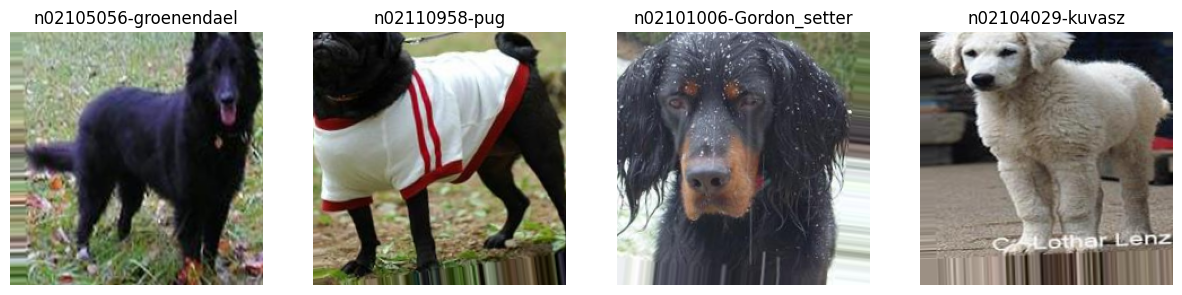

In [18]:
#Code referenced from https://github.com/renxzen/stanfordDogs/blob/main/stanfordDogs.ipynb

rand_gen = sd_gen.flow_from_directory(
    train_directory,
    target_size=(224,224),
    batch_size=1,
    class_mode='categorical',
    subset='training'
)

plt.figure(figsize=(15,10))
for i in range(4):
    rand_img = next(rand_gen)
    name = list(rand_gen.class_indices.keys())[list(rand_gen.class_indices.values()).index(np.argmax(rand_img[1]))]
    print(rand_gen)
    print(rand_img)
    print(len(rand_img[0][0]))
    print(len(rand_img[1][0]))
    print(len(rand_img))

    plt.subplot(1,4,i+1)
    plt.title(name)
    plt.imshow(rand_img[0].reshape(224, 224, 3))
    plt.axis('off')

# **Training the ResNet50V2 pre-trained model**

In [9]:
# ResNet50V2 Pre-trained Model
# https://keras.io/api/applications/

base_model_rsn = keras.applications.ResNet50V2(
    weights = 'imagenet',
    input_shape=(224, 224, 3),
    include_top=False)

#Architecture referenced from https://github.com/renxzen/stanfordDogs/blob/main/stanfordDogs.ipynb
x = keras.layers.Flatten()(base_model_rsn.output)
x = keras.layers.Dropout(0.4)(x)
x = keras.layers.Dense(2048, activation='relu')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dropout(0.4)(x)
x = keras.layers.Dense(2048, activation='relu')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dropout(0.2)(x)

out = keras.layers.Dense(120, activation='softmax')(x)

base_model_rsn.trainable = False
for layer in base_model_rsn.layers:
    layer.trainable = False

In [10]:
model_rsn = keras.Model(base_model_rsn.input, out)

#Compiling the model
model_rsn.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(lr=0.001),
    metrics=['accuracy']
)

In [11]:
#Setting checkpoints to save epochs with best validation accuracy
checkpoint_path = "training/cp-best.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
callbacks = [ keras.callbacks.ModelCheckpoint(checkpoint_dir, monitor='val_accuracy', verbose=1, save_weights_only = True, save_best_only = True, mode='max')]

In [32]:
#Training the model
history_rsn = model_rsn.fit(
    train_gen,
    validation_data=val_gen,
    steps_per_epoch=80,
    validation_steps=50,  
    epochs=50,
    verbose=1,
    callbacks=callbacks
)

Epoch 1/50
80/80 [==============================] - ETA: 0s - loss: 2.2468 - accuracy: 0.4822
Epoch 1: val_accuracy improved from -inf to 0.58594, saving model to training
80/80 [==============================] - 701s 9s/step - loss: 2.2468 - accuracy: 0.4822 - val_loss: 2.7032 - val_accuracy: 0.5859
Epoch 2/50
43/80 [===============>..............] - ETA: 3:51 - loss: 1.5723 - accuracy: 0.6119

KeyboardInterrupt: 

In [ ]:
#Saving the model
model_rsn.save("/doog breed/Stanford Dogs/dogbreedidentificationresnet50v2l_50e.model", save_format="h5")

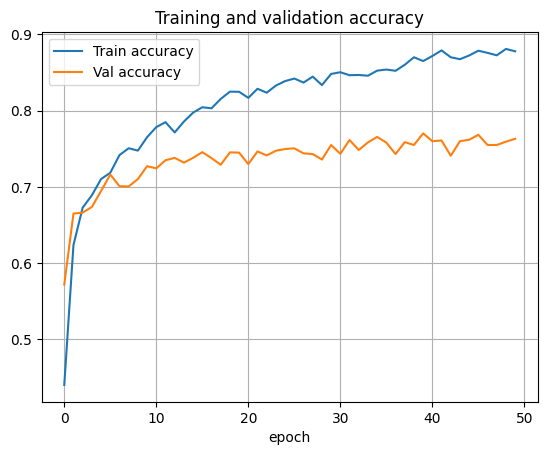

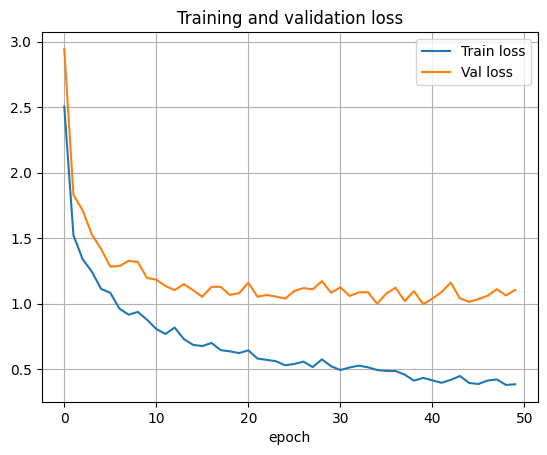

In [38]:
#Plotting graphs to visualize the progression of training and validation accuracy and loss curves
fig = plt.figure()

plt.plot(history_rsn.history['accuracy'], label='Train accuracy')
plt.plot(history_rsn.history['val_accuracy'], label='Val accuracy')
plt.legend(loc=0)
plt.title('Training and validation accuracy')
plt.grid(True)
plt.xlabel('epoch')
plt.show()

plt.plot(history_rsn.history['loss'], label='Train loss')
plt.plot(history_rsn.history['val_loss'], label='Val loss')
plt.legend(loc=0)
plt.title('Training and validation loss')
plt.grid(True)
plt.xlabel('epoch')
plt.show()

In [ ]:
# **Training the DenseNet201 pre-trained model**

In [ ]:
# DenseNet201 Pre-trained Model
# https://keras.io/api/applications/

base_model_dns = keras.applications.DenseNet201(
    weights = 'imagenet',
    input_shape=(224, 224, 3),
    include_top=False)

#Architecture referenced from https://github.com/renxzen/stanfordDogs/blob/main/stanfordDogs.ipynb
x = keras.layers.Flatten()(base_model_dns.output)
x = keras.layers.Dropout(0.4)(x)
x = keras.layers.Dense(2048, activation='relu')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dropout(0.4)(x)
x = keras.layers.Dense(2048, activation='relu')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dropout(0.2)(x)
out = keras.layers.Dense(120, activation='softmax')(x)

base_model_dns.trainable = False
for layer in base_model_dns.layers:
    layer.trainable = False

74850304/74836368 [==============================] - 1s 0us/step


In [ ]:
model_dns = keras.Model(base_model_dns.input, out)

#Compiling the model
model_dns.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(lr=0.001),
    metrics=['accuracy']
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
#Setting checkpoints to save epochs with best validation accuracy
checkpoint_path = "training/cp-best.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
callbacks = [ keras.callbacks.ModelCheckpoint(checkpoint_dir, monitor='val_accuracy', verbose=1, save_weights_only = True, save_best_only = True, mode='max')]

In [ ]:
#Training the model
history_dns = model_dns.fit(
    train_gen,
    steps_per_epoch=80,  
    epochs=50,
    verbose=1,
    callbacks=callbacks,
    validation_data=val_gen,
    validation_steps=50
)

Epoch 1/50
80/80 [==============================] - ETA: 0s - loss: 2.1659 - accuracy: 0.4910 
Epoch 1: val_accuracy improved from -inf to 0.50063, saving model to training
80/80 [==============================] - 2700s 34s/step - loss: 2.1659 - accuracy: 0.4910 - val_loss: 3.5835 - val_accuracy: 0.5006
Epoch 2/50
80/80 [==============================] - ETA: 0s - loss: 1.2869 - accuracy: 0.6751 
Epoch 2: val_accuracy improved from 0.50063 to 0.65281, saving model to training
80/80 [==============================] - 1389s 17s/step - loss: 1.2869 - accuracy: 0.6751 - val_loss: 1.7982 - val_accuracy: 0.6528
Epoch 3/50
80/80 [==============================] - ETA: 0s - loss: 1.1253 - accuracy: 0.7039
Epoch 3: val_accuracy improved from 0.65281 to 0.67250, saving model to training
80/80 [==============================] - 872s 11s/step - loss: 1.1253 - accuracy: 0.7039 - val_loss: 1.5256 - val_accuracy: 0.6725
Epoch 4/50
80/80 [==============================] - ETA: 0s - loss: 1.0229 - accu

In [ ]:
#Saving the model
model_dns.save("/content/gdrive/MyDrive/Stanford Dogs/dogbreedidentificationdensenet201_50e.model", save_format="h5")

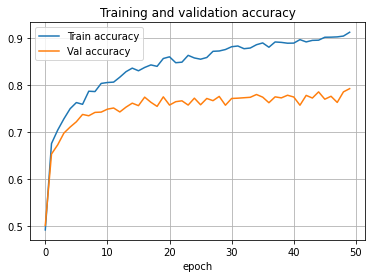

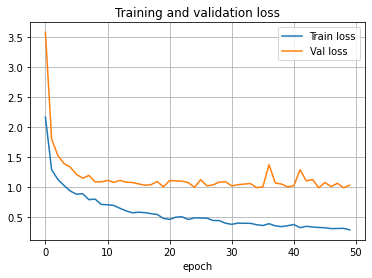

In [ ]:
#Plotting graphs to visualize the progression of training and validation accuracy and loss curves
fig = plt.figure()

plt.plot(history_dns.history['accuracy'], label='Train accuracy')
plt.plot(history_dns.history['val_accuracy'], label='Val accuracy')
plt.legend(loc=0)
plt.title('Training and validation accuracy')
plt.grid(True)
plt.xlabel('epoch')
plt.show()

plt.plot(history_dns.history['loss'], label='Train loss')
plt.plot(history_dns.history['val_loss'], label='Val loss')
plt.legend(loc=0)
plt.title('Training and validation loss')
plt.grid(True)
plt.xlabel('epoch')
plt.show()

# **Training the InceptionV3 pre-trained model**

In [ ]:
# InceptionV3 Pre-trained Model
# https://keras.io/api/applications/

base_model_incp = keras.applications.InceptionV3(
    weights = 'imagenet',
    input_shape=(224, 224, 3),
    include_top=False)

#Architecture referenced from https://github.com/renxzen/stanfordDogs/blob/main/stanfordDogs.ipynb
x = keras.layers.Flatten()(base_model_incp.output)
x = keras.layers.Dropout(0.4)(x)
x = keras.layers.Dense(2048, activation='relu')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dropout(0.4)(x)
x = keras.layers.Dense(2048, activation='relu')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dropout(0.2)(x)
out = keras.layers.Dense(120, activation='softmax')(x)

base_model_incp.trainable = False
for layer in base_model_incp.layers:
    layer.trainable = False

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
model_incp = keras.Model(base_model_incp.input, out)

#Compiling the model
model_incp.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(lr=0.001),
    metrics=['accuracy']
)

In [ ]:
#Setting checkpoints to save epochs with best validation accuracy
checkpoint_path = "training/cp-best.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
callbacks = [ keras.callbacks.ModelCheckpoint(checkpoint_dir, monitor='val_accuracy', verbose=1, save_weights_only = True, save_best_only = True, mode='max')]

In [ ]:
#Training the model
history_incp = model_incp.fit(
    train_gen,
    steps_per_epoch=80,  
    epochs=50,
    verbose=1,
    callbacks=callbacks,
    validation_data=val_gen,
    validation_steps=50
)

Epoch 1/50
80/80 [==============================] - ETA: 0s - loss: 1.7328 - accuracy: 0.6235 
Epoch 1: val_accuracy improved from -inf to 0.59219, saving model to training
80/80 [==============================] - 6116s 77s/step - loss: 1.7328 - accuracy: 0.6235 - val_loss: 3.8670 - val_accuracy: 0.5922
Epoch 2/50
80/80 [==============================] - ETA: 0s - loss: 1.1953 - accuracy: 0.7404 
Epoch 2: val_accuracy improved from 0.59219 to 0.72625, saving model to training
80/80 [==============================] - 3077s 39s/step - loss: 1.1953 - accuracy: 0.7404 - val_loss: 1.6237 - val_accuracy: 0.7262
Epoch 3/50
80/80 [==============================] - ETA: 0s - loss: 1.1078 - accuracy: 0.7572 
Epoch 3: val_accuracy improved from 0.72625 to 0.75281, saving model to training
80/80 [==============================] - 1906s 24s/step - loss: 1.1078 - accuracy: 0.7572 - val_loss: 1.5380 - val_accuracy: 0.7528
Epoch 4/50
80/80 [==============================] - ETA: 0s - loss: 0.9621 - ac

In [ ]:
#Saving the model
model_incp.save("/content/gdrive/MyDrive/Stanford Dogs/dogbreedidentificationincpv3_50e.model", save_format="h5")

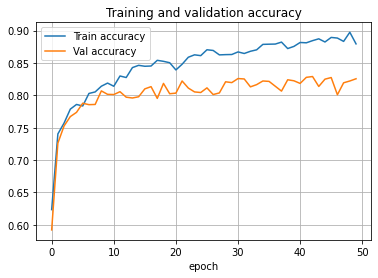

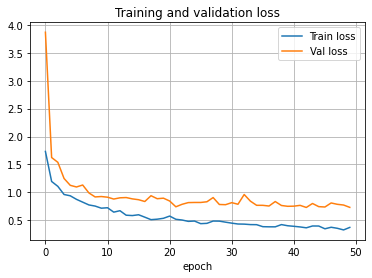

In [ ]:
#Plotting graphs to visualize the progression of training and validation accuracy and loss curves
fig = plt.figure()

plt.plot(history_incp.history['accuracy'], label='Train accuracy')
plt.plot(history_incp.history['val_accuracy'], label='Val accuracy')
plt.legend(loc=0)
plt.title('Training and validation accuracy')
plt.grid(True)
plt.xlabel('epoch')
plt.show()

plt.plot(history_incp.history['loss'], label='Train loss')
plt.plot(history_incp.history['val_loss'], label='Val loss')
plt.legend(loc=0)
plt.title('Training and validation loss')
plt.grid(True)
plt.xlabel('epoch')
plt.show()

# **Training the CNN model built from scratch**

In [ ]:
model = Sequential()

model.add(BatchNormalization(input_shape=(224, 224, 3)))
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())

model.add(GlobalAveragePooling2D())
model.add(Dense(120, activation='softmax'))

In [ ]:
#Compiling the model
model.compile(optimizer=keras.optimizers.Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Setting checkpoints to save epochs with best validation accuracy
checkpoint_path = "training/cp-best.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
callbacks = [ keras.callbacks.ModelCheckpoint(checkpoint_dir, monitor='val_accuracy', verbose=1, save_weights_only = True, save_best_only = True, mode='max')]

In [ ]:
#Training the model
history = model.fit(
    train_gen,
    steps_per_epoch=80,  
    epochs=50,
    verbose=1,
    callbacks=callbacks,
    validation_data=val_gen,
    validation_steps=50
)

Epoch 1/50
80/80 [==============================] - ETA: 0s - loss: 4.4720 - accuracy: 0.0401
Epoch 1: val_accuracy improved from -inf to 0.00750, saving model to training
80/80 [==============================] - 97s 1s/step - loss: 4.4720 - accuracy: 0.0401 - val_loss: 5.1183 - val_accuracy: 0.0075
Epoch 2/50
80/80 [==============================] - ETA: 0s - loss: 4.1343 - accuracy: 0.0717
Epoch 2: val_accuracy improved from 0.00750 to 0.00969, saving model to training
80/80 [==============================] - 97s 1s/step - loss: 4.1343 - accuracy: 0.0717 - val_loss: 5.3805 - val_accuracy: 0.0097
Epoch 3/50
80/80 [==============================] - ETA: 0s - loss: 3.9242 - accuracy: 0.0957
Epoch 3: val_accuracy improved from 0.00969 to 0.02281, saving model to training
80/80 [==============================] - 96s 1s/step - loss: 3.9242 - accuracy: 0.0957 - val_loss: 5.5684 - val_accuracy: 0.0228
Epoch 4/50
80/80 [==============================] - ETA: 0s - loss: 3.7958 - accuracy: 0.11

In [ ]:
#Saving the model
model.save("/content/gdrive/MyDrive/Stanford Dogs/dogbreedidentificationowncnn_50e.model", save_format="h5")

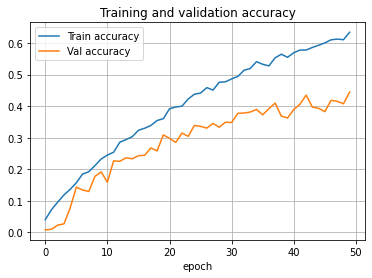

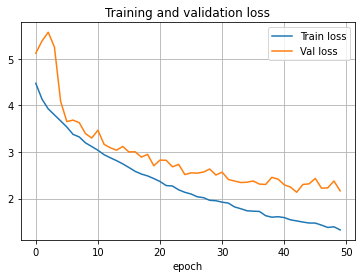

In [ ]:
#Plotting graphs to visualize the progression of training and validation accuracy and loss curves
fig = plt.figure()

plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.legend(loc=0)
plt.title('Training and validation accuracy')
plt.grid(True)
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.legend(loc=0)
plt.title('Training and validation loss')
plt.grid(True)
plt.xlabel('epoch')
plt.show()

# **Loading the trained models**

In [ ]:
# We load our ResNet50v2 model
model_rsn = keras.models.load_model('/content/gdrive/MyDrive/Stanford Dogs/dogbreedidentificationresnet50v2_50e.model')

In [ ]:
# We load our DenseNet201 model
model_dns = keras.models.load_model('/content/gdrive/MyDrive/Stanford Dogs/dogbreedidentificationdensenet201_50e.model')

In [ ]:
# We load our Inceptionv3 model
model_incp = keras.models.load_model('/content/gdrive/MyDrive/Stanford Dogs/dogbreedidentificationincpv3_50e.model')

In [ ]:
# We load our CNN model built from scratch
model = keras.models.load_model('/content/gdrive/MyDrive/Stanford Dogs/dogbreedidentificationowncnn_50e.model')

# **Evaluating the models on the validation dataset without any augmentation techniques**

In [ ]:
val_directory = "/content/gdrive/MyDrive/data"

#Data Augmentation and train-val split
sd_gen = ImageDataGenerator(
    rescale = 1./255,
    validation_split=0.2
)

val_gen = sd_gen.flow_from_directory(
    val_directory,
    target_size=(224,224),
    batch_size=64,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

Found 4072 images belonging to 120 classes.


In [ ]:
loss, acc = model_rsn.evaluate(val_gen) #evaluating ResNet50V2 model on new validation set
print(f"val_loss: {loss}, val_acc:{round(acc*100,2)}%")

64/64 [==============================] - 1285s 20s/step - loss: 0.9917 - accuracy: 0.7822
val_loss: 0.9916970729827881, val_acc:78.22%


In [ ]:
loss1, acc1 = model_dns.evaluate(val_gen) #evaluating DenseNet201 model on new validation set
print(f"val_loss: {loss1}, val_acc:{round(acc1*100,2)}%")

64/64 [==============================] - 18s 217ms/step - loss: 0.8693 - accuracy: 0.8084
val_loss: 0.8692684173583984, val_acc:80.84%


In [ ]:
loss2, acc2 = model_incp.evaluate(val_gen) #evaluating InceptionV3 model on new validation set
print(f"val_loss: {loss2}, val_acc:{round(acc2*100,2)}%")

64/64 [==============================] - 15s 197ms/step - loss: 0.6885 - accuracy: 0.8377
val_loss: 0.6885112524032593, val_acc:83.77%


In [ ]:
loss3, acc3 = model.evaluate(val_gen) #evaluating CNN model built from scratch on new validation set
print(f"val_loss: {loss3}, val_acc:{round(acc3*100,2)}%")

64/64 [==============================] - 12s 189ms/step - loss: 2.0832 - accuracy: 0.4590
val_loss: 2.083214044570923, val_acc:45.9%


# **Evaluating the models on a fresh test dataset of uncropped images without any augmentation techniques.**

In [ ]:
test_directory = "/content/gdrive/MyDrive/Stanford Dogs/images/Images/"

#Data Augmentation and train-val split
sd_gen = ImageDataGenerator(
    rescale = 1./255,
    validation_split=0.2
)

test_gen = sd_gen.flow_from_directory(
    test_directory,
    target_size=(224,224),
    batch_size=64,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

Found 4072 images belonging to 120 classes.


In [ ]:
loss_test, acc_test = model_rsn.evaluate(test_gen) #evaluating ResNet50V2 model on fresh test set
print(f"test_loss: {loss_test}, test_acc:{round(acc_test*100,2)}%")

64/64 [==============================] - 1373s 22s/step - loss: 1.7990 - accuracy: 0.6645
test_loss: 1.7989661693572998, test_acc:66.45%


In [ ]:
loss_test1, acc_test1 = model_dns.evaluate(test_gen) #evaluating DenseNet201 model on fresh test set
print(f"test_loss: {loss_test1}, test_acc:{round(acc_test1*100,2)}%")

64/64 [==============================] - 22s 341ms/step - loss: 1.3942 - accuracy: 0.7343
test_loss: 1.394180178642273, test_acc:73.43%


In [ ]:
loss_test2, acc_test2 = model_incp.evaluate(test_gen) #evaluating InceptionV3 model on fresh test set
print(f"test_loss: {loss_test2}, test_acc:{round(acc_test2*100,2)}%")

64/64 [==============================] - 21s 331ms/step - loss: 1.2971 - accuracy: 0.7490
test_loss: 1.2970794439315796, test_acc:74.9%


In [ ]:
loss_test3, acc_test3 = model.evaluate(test_gen) #evaluating CNN model built from scratch on fresh test set
print(f"test_loss: {loss_test3}, test_acc:{round(acc_test3*100,2)}%")

64/64 [==============================] - 1335s 21s/step - loss: 3.2414 - accuracy: 0.2753
test_loss: 3.2414069175720215, test_acc:27.53%
